In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()
sns.set_context('talk')

In [2]:
abortion = pd.read_csv("abortion_laws.csv", skiprows=2)
abortion = abortion.drop(columns=["Footnotes"])
abortion = abortion[1:52]
abortion['Abortion Overview'] = 0
abortion.loc[(abortion['Pre-Roe Abortion Ban Still State Law'] == 'Yes') | (abortion['State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted'] == 'Yes'),'Abortion Overview'] = 'significantly restricted'
abortion.loc[(abortion['State Law Protecting the Right to Abortion'] == 'Yes'),'Abortion Overview'] = 'protected'
abortion.loc[(abortion['Abortion Overview'] == 0),'Abortion Overview'] = 'neither'

In [3]:
childcare = pd.read_csv("childcare_states.csv", skiprows=1)
childcare = childcare[:51]

In [4]:
paid_leave = pd.read_csv("paid_leave_laws.csv", skiprows=1)
paid_leave = paid_leave.drop(["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"], axis=1)
paid_leave = paid_leave[:51]

In [5]:
df = abortion.merge(childcare, how='inner', left_on='Location', right_on="State")
all_data = df.merge(paid_leave, how='inner', left_on='Location', right_on="State")
all_data = all_data.drop(columns=["Location", "Pre-Roe Abortion Ban Still State Law", "State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted", "State Law Protecting the Right to Abortion"])
all_data.head()

,Abortion Overview,State_x,"Average Annual Cost of Full-Time Infant Care in a Center as Percent of Women's Median Annual Earnings, 2013a","Cost of Infant Care as Percent of Women's Median Annual Earningsa,b",Rank_x,"Percent of Four-Year-Olds Enrolled in State Pre-K, Preschool Special Education, and State and Federal Head Start, 2012–2013c",Rank,"Preschool Quality Standards (out of 10), 2012–2013c",Rank.1,Child Care Total Score,Rank.2,State_y,Temporary Disability Insurance Statewidea,Paid Leave (for FMLA Related Reasons)a,Paid Sick Daysb,Paid Leave Legislation Total Score,Rank_y
0,significantly restricted,Alabama,"$5,547",16.8%,1.0,22.9%,35.0,10.0,1.0,1.42,11.0,Alabama,No,No,No,0.0,12.0
1,neither,Alaska,"$10,280",23.9%,16.0,21.7%,38.0,10.0,1.0,1.37,15.0,Alaska,No,No,No,0.0,12.0
2,significantly restricted,Arizona,"$9,166",25.5%,23.0,19.0%,41.0,5.0,35.0,0.97,39.0,Arizona,No,No,No,0.0,12.0
3,significantly restricted,Arkansas,"$5,933",19.8%,7.0,50.6%,13.0,9.0,5.0,1.54,5.0,Arkansas,No,No,No,0.0,12.0
4,protected,California,"$11,628",27.7%,33.0,28.7%,27.0,4.0,37.0,0.95,40.0,California,Yes,Yes,State,2.0,1.0


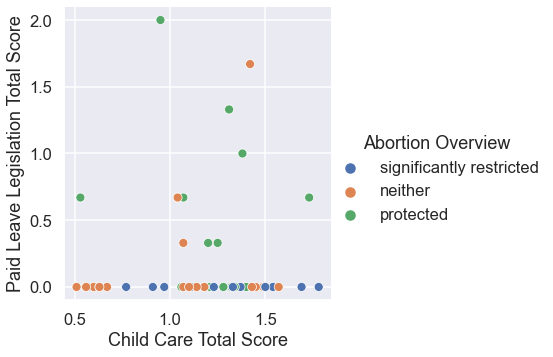

In [6]:
sns.relplot(data=all_data, x = "Child Care Total Score", y = "Paid Leave Legislation Total Score", hue = "Abortion Overview")

In [10]:
def fix_data_types(df):
    df = df.infer_objects()
    df = df.astype({"statefips": str, "countyfips": str})
    df["countyfips"] = df["countyfips"].apply(lambda x: x.zfill(3))
    df["GEOID20"] = df["statefips"] + df["countyfips"]
    return df

In [19]:
sahie_2018 = pd.read_csv("sahie_2018.csv", header=68, low_memory=False)
sahie_2018 = fix_data_types(sahie_2018)
sahie_2018 = sahie_2018.drop(columns=["statefips", "version", "year", "countyfips", "county_name", "Unnamed: 25", "GEOID20"])
sahie_2018

,geocat,agecat,racecat,sexcat,iprcat,NIPR,nipr_moe,NUI,nui_moe,NIC,nic_moe,PCTUI,pctui_moe,PCTIC,pctic_moe,PCTELIG,pctelig_moe,PCTLIIC,pctliic_moe,state_name
0,40,0,0,0,0,3955117,0,470052,13365,3485065,13365,11.9,0.3,88.1,0.3,11.9,0.3,88.1,0.3,Alabama ...
1,40,0,0,0,1,1460808,14401,286457,9710,1174351,14558,19.6,0.6,80.4,0.6,7.2,0.2,29.7,0.4,Alabama ...
2,40,0,0,0,2,1805111,14730,334174,10549,1470937,15318,18.5,0.6,81.5,0.6,8.4,0.3,37.2,0.4,Alabama ...
3,40,0,0,0,3,989540,13194,203801,8046,785739,12787,20.6,0.8,79.4,0.8,5.2,0.2,19.9,0.3,Alabama ...
4,40,0,0,0,4,2679733,14962,415673,12137,2264060,16839,15.5,0.4,84.5,0.4,10.5,0.3,57.2,0.4,Alabama ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320293,50,5,0,2,1,441,46,103,28,338,44,23.4,5.8,76.6,5.8,5.9,1.6,19.2,2.5,Wyoming ...
320294,50,5,0,2,2,583,51,130,33,453,50,22.3,5.3,77.7,5.3,7.4,1.9,25.8,2.8,Wyoming ...
320295,50,5,0,2,3,292,39,73,22,219,35,25.0,6.6,75.0,6.6,4.2,1.3,12.5,2.0,Wyoming ...
320296,50,5,0,2,4,962,62,175,40,787,64,18.2,4.0,81.8,4.0,9.9,2.3,44.7,3.6,Wyoming ...
